In [1]:
import pandas as pd
import numpy_financial
import matplotlib.pyplot as plt

In [2]:
countries = ['DK', 'NL', 'BE', 'DE', 'PL', 'CZ', 'AT', 'CH']

# Input

In [3]:
params = {
    'capacity': 2, # MW
    'invest': 963000, # €/MW
    'cost_qfix': 11340, # €/MW/year
    'lifetime': 30, # years
    'wacc': 0.073,  
    'availability': 0.9
}

In [58]:
turbines = pd.DataFrame()
for c in countries:
    tmp = pd.read_csv(f"../build/turbines-{c}.csv", index_col=0)[
        ['lcoe_eur_per_mwh', 'disamenity_cost_eur_per_mwh', '1', '2', '3', '4']
    ]
    tmp.columns = ['engineering', 'disamenity', 1, 2, 3, 4]
    tmp['disamenity'] = tmp['disamenity'] / 8
    tmp[c] = 2
    turbines = turbines.append(tmp)
    #tmp['total'].sort_values().reset_index(drop=True).plot()
turbines.mean()

engineering      42.908744
disamenity        2.474464
1               277.909668
2              1059.288206
3              2003.056687
4              2976.533388
DK                2.000000
NL                2.000000
BE                2.000000
DE                2.000000
PL                2.000000
CZ                2.000000
AT                2.000000
CH                2.000000
dtype: float64

# Plots

Cost potential curves

113.02380000000001

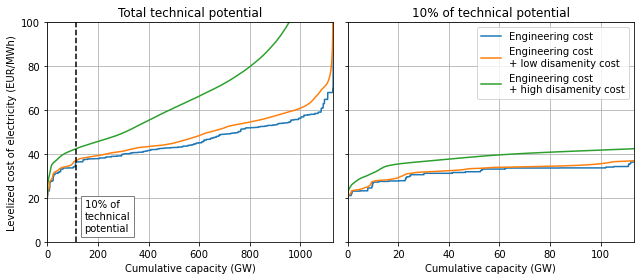

In [49]:
c = 'DE'

fig = plt.figure(figsize=[9,4])

tmp = turbines[turbines[c]>0].copy()
cumulative_capacity = tmp[c].cumsum() / 1000
engineering_cost = tmp['engineering'].sort_values()
total_cost_low = (tmp['engineering'] + tmp['disamenity']).sort_values()
total_cost_high = (tmp['engineering'] + 10 * tmp['disamenity']).sort_values()

ax1 = fig.add_subplot(121)

plt.plot(cumulative_capacity, engineering_cost)
plt.plot(cumulative_capacity, total_cost_low)
plt.plot(cumulative_capacity, total_cost_high)

plt.axvline(0.1 * cumulative_capacity.iloc[-1], color='black', linestyle='--')
plt.text(0.13 * cumulative_capacity.iloc[-1], 5, '10% of\ntechnical\npotential', 
         bbox={'facecolor': 'white', 'edgecolor': 'grey'})

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Levelized cost of electricity (EUR/MWh)')
plt.xlim(0, cumulative_capacity.iloc[-1])
plt.ylim(0, 100)
plt.grid()
plt.title('Total technical potential')

ax2 = fig.add_subplot(122)
ax2.set_yticklabels('')

plt.plot(cumulative_capacity, engineering_cost, label='Engineering cost')
plt.plot(cumulative_capacity, total_cost_low, label='Engineering cost\n+ low disamenity cost')
plt.plot(cumulative_capacity, total_cost_high, label='Engineering cost\n+ high disamenity cost')

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 0.1 * cumulative_capacity.iloc[-1])
plt.ylim(0, 100)
plt.grid()
plt.title('10% of technical potential')

plt.legend()
plt.tight_layout()
plt.savefig('Figure 2.png')

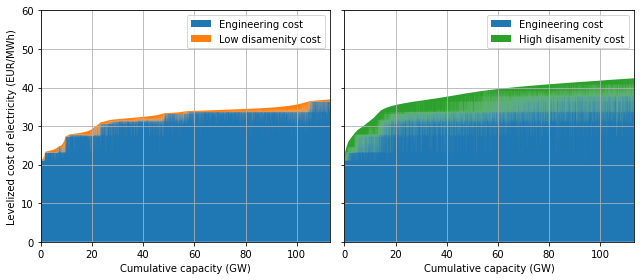

In [59]:
c = 'DE'

fig = plt.figure(figsize=[9,4])

tmp = turbines[turbines[c]>0].copy()
cumulative_capacity = cumulative_capacity = tmp[c].cumsum() / 1000

ax1 = fig.add_subplot(121)

tmp['total'] = tmp['engineering'] + tmp['disamenity']
engineering_cost = tmp.sort_values(['total', 'engineering'])['engineering']
plt.fill_between(cumulative_capacity, 0, engineering_cost, label='Engineering cost')

disamenity_cost = tmp.sort_values('total')['total']
plt.fill_between(cumulative_capacity, engineering_cost, disamenity_cost, label='Low disamenity cost')

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Levelized cost of electricity (EUR/MWh)')
plt.xlim(0, 0.1 * cumulative_capacity.iloc[-1])
plt.ylim(0, 60)
plt.grid()
plt.legend()


ax2 = fig.add_subplot(122)
ax2.set_yticklabels('')

tmp['total'] = tmp['engineering'] + 10 * tmp['disamenity']
engineering_cost = tmp.sort_values(['total', 'engineering'])['engineering']
plt.fill_between(cumulative_capacity, 0, engineering_cost, label='Engineering cost')

disamenity_cost = tmp.sort_values('total')['total']
plt.fill_between(cumulative_capacity, engineering_cost, disamenity_cost, facecolor='tab:green', label='High disamenity cost')

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 0.1 * cumulative_capacity.iloc[-1])
plt.ylim(0, 60)
plt.grid()
plt.legend()

plt.tight_layout()
plt.savefig('Figure 3.png')

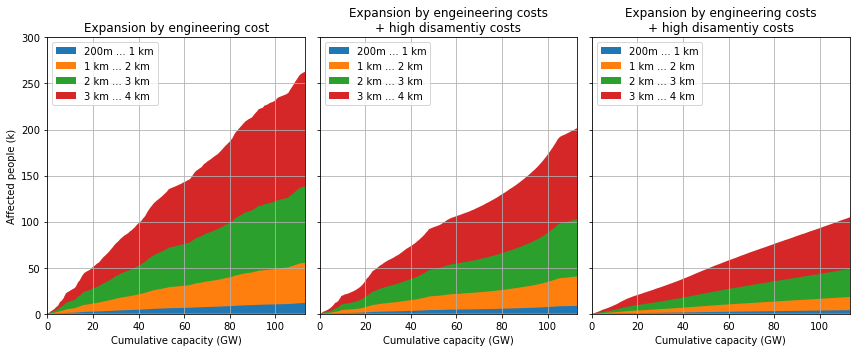

In [64]:
label_map = {
    1: '200m ... 1 km',
    2: '1 km ... 2 km',
    3: '2 km ... 3 km',
    4: '3 km ... 4 km',
}
tmp = turbines[turbines['DE']>0].copy()
cumulative_capacity = tmp['DE'].cumsum() / 1000

fig = plt.figure(figsize=[12,5])

ax1 = fig.add_subplot(131)

tmp_eng = tmp.fillna(0).sort_values('engineering').reset_index(drop=True)[list(range(1, 5))].cumsum() /1000000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[c], label=label_map[d])
    bottom += tmp_eng[d]

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Affected people (k)')
plt.xlim(0, 0.1 * cumulative_capacity.iloc[-1])
plt.ylim(0, 300)

plt.legend(loc='upper left')
plt.title('Expansion by engineering cost')
plt.grid()


ax2 = fig.add_subplot(132)
ax2.set_yticklabels('')

tmp['total'] = tmp['engineering'] + tmp['disamenity']
tmp_eng = tmp.fillna(0).sort_values('total').reset_index(drop=True)[list(range(1, 5))].cumsum() /1000000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[c], label=label_map[d])
    bottom += tmp_eng[d]

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 0.1 * cumulative_capacity.iloc[-1])
plt.ylim(0, 300)

plt.legend(loc='upper left')
plt.title('Expansion by engeineering costs\n+ high disamentiy costs')
plt.grid()


ax3 = fig.add_subplot(133)
ax3.set_yticklabels('')

tmp['total'] = tmp['engineering'] + 10 * tmp['disamenity']
tmp_eng = tmp.fillna(0).sort_values('total').reset_index(drop=True)[list(range(1, 5))].cumsum() /1000000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[c], label=label_map[d])
    bottom += tmp_eng[d]

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 0.1 * cumulative_capacity.iloc[-1])
plt.ylim(0, 300)

plt.legend(loc='upper left')
plt.title('Expansion by engineering costs\n+ high disamentiy costs')
plt.grid()

plt.tight_layout()

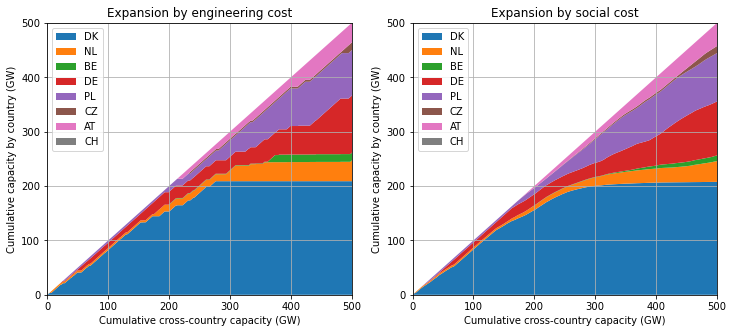

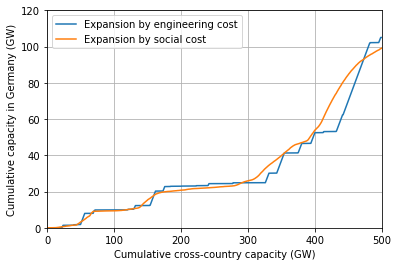

In [37]:
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(121)

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(turbines))]

tmp_eng = turbines.fillna(0).sort_values('engineering').reset_index(drop=True)[countries].cumsum() /1000

bottom = 0
for c in countries:
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[c], label=c)
    bottom += tmp_eng[c]

plt.xlabel('Cumulative cross-country capacity (GW)')
plt.ylabel('Cumulative capacity by country (GW)')
plt.xlim(0, 500)
plt.ylim(0, 500)

plt.legend(loc='upper left')
plt.title('Expansion by engineering cost')
plt.grid()

ax = fig.add_subplot(122)
#plt.figure(figsize=[6,5])

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(turbines))]

tmp_soc = turbines.fillna(0).sort_values('total').reset_index(drop=True)[countries].cumsum() /1000

bottom = 0
for c in countries:
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_soc[c], label=c)
    bottom += tmp_soc[c]

plt.xlabel('Cumulative cross-country capacity (GW)')
plt.ylabel('Cumulative capacity by country (GW)')
plt.xlim(0, 500)
plt.ylim(0, 500)

plt.legend(loc='upper left')
plt.title('Expansion by social cost')
plt.grid()

# DE only
expansion_DE = pd.concat([tmp_eng['DE'], tmp_soc['DE']], axis=1, keys=['Expansion by engineering cost', 'Expansion by social cost'])
expansion_DE.index = cumulative_capacity
expansion_DE.plot()
plt.xlabel('Cumulative cross-country capacity (GW)')
plt.ylabel('Cumulative capacity in Germany (GW)')
plt.xlim(0, 500)
plt.ylim(0, 120)
plt.grid()

(0.0, 20.0)

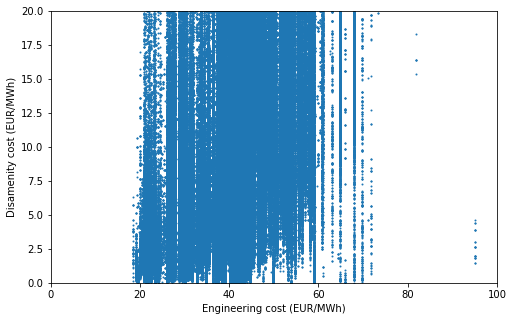

In [20]:
plt.figure(figsize=[8,5])

plt.scatter(turbines['engineering'], turbines['disamenity'], 1)

plt.xlabel('Engineering cost (EUR/MWh)')
plt.ylabel('Disamenity cost (EUR/MWh)')
plt.xlim(0, 100)
plt.ylim(0, 20)